In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import json
import io

In [2]:
def plot_cdf(filepath):
    all_info = []
    with open(filepath, "r") as f:
        data = json.load(f)
    for tech_data in data.get("aggregations", '').get("terms", '').get("buckets", ''):
        for pc_info in tech_data.get("cdf", '').get("values", ''):
            all_info.append([tech_data.get("key", ""), pc_info.get("key", ""), pc_info.get("value", "")])

    df = pd.DataFrame(all_info, columns=["technology", "percentiles", "latency"])
    df["latency"] = df["latency"] / 1000

    new_df = df[df.percentiles.isin([0, 50, 90, 95, 99, 100])]
    new_df = new_df.sort_values(by="technology", ascending=True)
    new_df = new_df.round({'latency': 1})

    table_data = [
        ['Min'] + new_df[new_df["percentiles"]==0]["latency"].tolist(),
        ['50th'] + new_df[new_df["percentiles"]==50]["latency"].tolist(),
        ['90th'] + new_df[new_df["percentiles"]==90]["latency"].tolist(),
        ['95th'] + new_df[new_df["percentiles"]==95]["latency"].tolist(),
        ['99th'] + new_df[new_df["percentiles"]==99]["latency"].tolist(),
        ['Max'] + new_df[new_df["percentiles"]==100]["latency"].tolist(),
    ]

    # General plot again
    # fig, ax1 = plt.figure(figsize=(15,7))
    fig, ax1 = plt.subplots()
    # fig.set_figure(figsize=(15,7))
    # sns.set_theme(style="whitegrid")

    for tech in ["DSL", "Cable", "Fiber"]:
        temp_df = df[df["technology"] == tech]
        x_num = temp_df["latency"]
        y = temp_df['percentiles']
        idx = np.isfinite(y) & np.isfinite(x_num)
        x_fit = np.linspace(x_num.min(), x_num.max())
        ax1.plot(x_num, y, label=f"{tech}")

    ax1.set_ylabel('Percentiles')
    ax1.set_xlabel('Latency (ms)')
    ax1.ticklabel_format(style='plain') # prevent scientific notation
    # plt.title(f"Median of Idle Latency Measurements Per Month by Technology (2011 – 2023)")

    # Create the table within the plot
    table = ax1.table(
        cellText=table_data,
        # colLabels=['Percentile', 'Min', '50th', '90th', '95th', '99th', '99.9th', 'Max'],
        colWidths=[0.2, 0.1, 0.1, 0.1],
        colLabels=['Percentile', 'Cable', 'DSL', 'Fiber'],
        loc='lower right',
        cellLoc='center'
    )
    table.scale(1, 1)
    table.auto_set_font_size(False)  # Prevent automatic font resizing
    table.set_fontsize(8)  # Adjust font size as needed

    plt.legend(loc="center right")
    # And show
    plt.show()

## CDF of Downstream LUL (rtt_max)

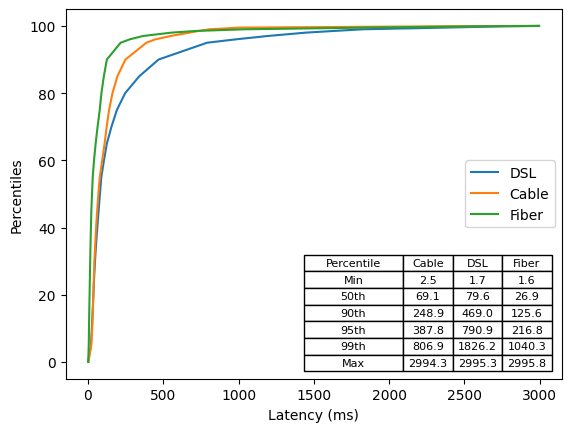

In [3]:
plot_cdf("cdf_data/CDF of rtt_max Downstream LUL.json")

## CDF of Downstream LUL (rtt_min)

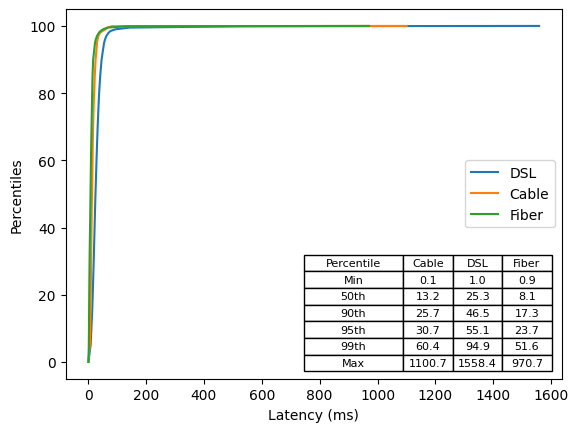

In [4]:
plot_cdf("cdf_data/CDF of rtt_min Downstream LUL.json")

## CDF of Downstream LUL (rtt_avg)

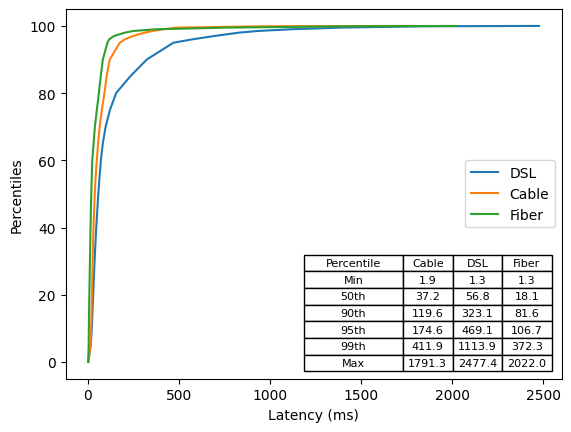

In [5]:
plot_cdf("cdf_data/CDF of rtt_avg Downstream LUL.json")

## CDF of Downstream LUL (rtt_std)

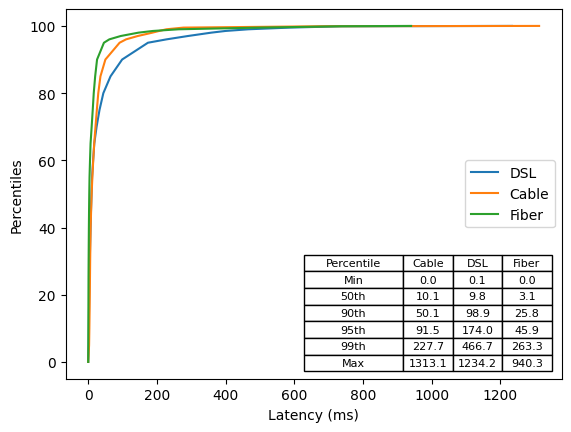

In [6]:
plot_cdf("cdf_data/CDF of rtt_std Downstream LUL.json")

## CDF of Upstream LUL (rtt_max)

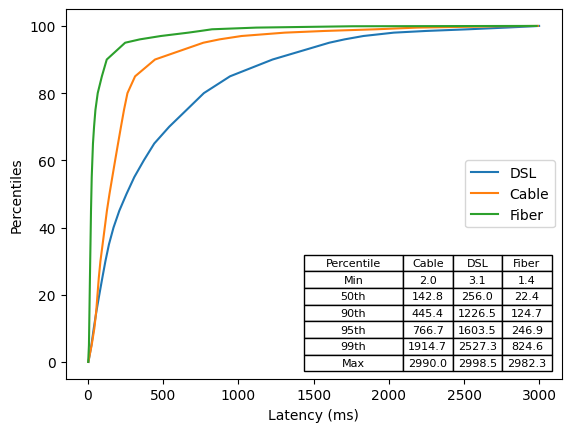

In [7]:
plot_cdf("cdf_data/CDF of rtt_max Upstream LUL.json")

## CDF of Upstream LUL (rtt_min)

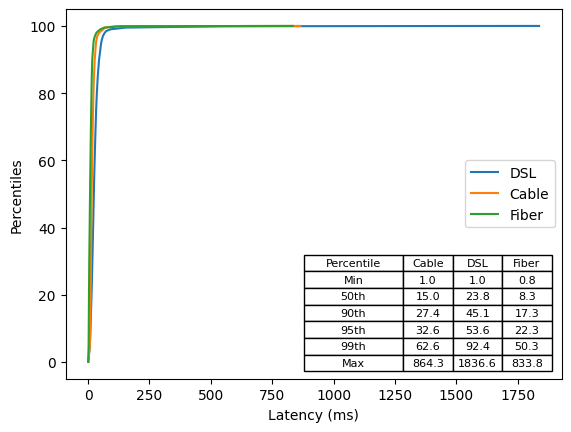

In [8]:
plot_cdf("cdf_data/CDF of rtt_min Upstream LUL.json")

## CDF of Upstream LUL (rtt_avg)

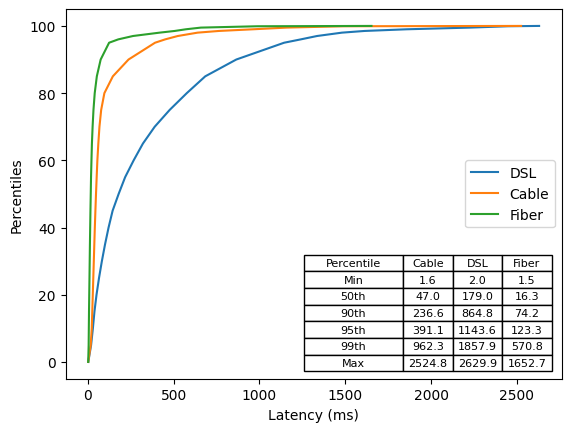

In [9]:
plot_cdf("cdf_data/CDF of rtt_avg Upstream LUL.json")

## CDF of Upstream LUL (rtt_std)

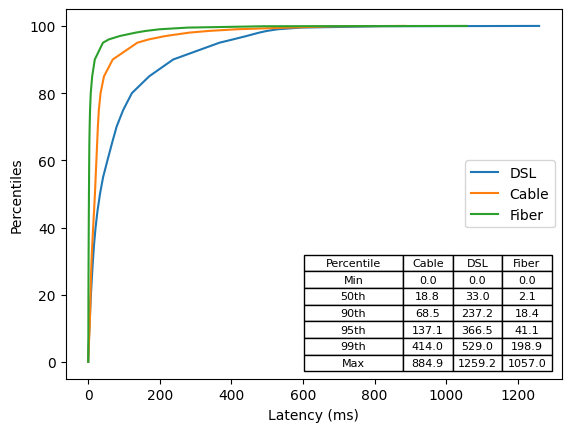

In [10]:
plot_cdf("cdf_data/CDF of rtt_std Upstream LUL.json")